# Band calculations on Gr.
## Basic energy information and preprocessing for band structures

In [1]:
import pymatgen as mg
# from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen.io.vasp.outputs import Outcar, Oszicar
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get basic POSCAR info
from pymatgen.io.vasp import Poscar
poscar = Poscar.from_file("POSCAR")
formula = poscar.structure.formula

In [3]:
# Print some info about the DOS run
from pymatgen.io.vasp.inputs import Incar

incar = Incar().from_file("INCAR").get_string()
print('Analytics information:\n{}'.format(incar))

Analytics information:
SYSTEM = Bilayer_graphene_aa
ISTART = 0
ISMEAR = 0
SIGMA = 0.01
ENCUT = 800
AMIN = 0.01
NSW = 40
EDIFF = 1e-08
EDIFFG = -1e-06
IBRION = 2
SYMPREC = 0.0001
NPAR = 6
ADDGRID = True
LREAL = False
LWAVE = False
ALGO = N
NELMIN = 5
PREC = Accurate



In [4]:
# Get the basic objects
OutFull = Outcar("./OUTCAR")
print("Final energy:", OutFull.final_energy)
print("Fermi energy:", OutFull.efermi)
print("Stopped by user:", OutFull.is_stopped)

Final energy: -17.3589403
Fermi energy: -2.6142
Stopped by user: False


In [5]:
# Other stuff
OutBasics = Oszicar("OSZICAR")
# print("Complete energy array:\n", OutBasics.all_energies)

In [6]:
energyMatrix = OutBasics.all_energies
indexer = []
for i in range(0, len(energyMatrix)):
    indexer.append(list(range(0, len(energyMatrix[i]))))
    indexer[i] = tuple(indexer[i])
indexer = tuple(indexer)
# Convert everything to tuples so we can pair them with energyMatrix elements in a moment
print(indexer)

((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23),)


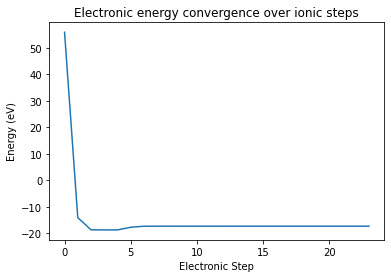

In [7]:
# Plotting
plt.xlabel("Electronic Step")
plt.ylabel("Energy (eV)")
plt.title("Electronic energy convergence over ionic steps")
for i in range(0, len(energyMatrix)):
    plt.plot(indexer[i], energyMatrix[i], label='Step {}'.format(i+1))
# plt.legend()
# plt.ylim(-37.2, -36.8)

## Band structures

In [8]:
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen import Spin
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter

# Get the full run daga and extract DOS
run = Vasprun("vasprun.xml", parse_projected_eigen=True)
structure = run.get_band_structure()

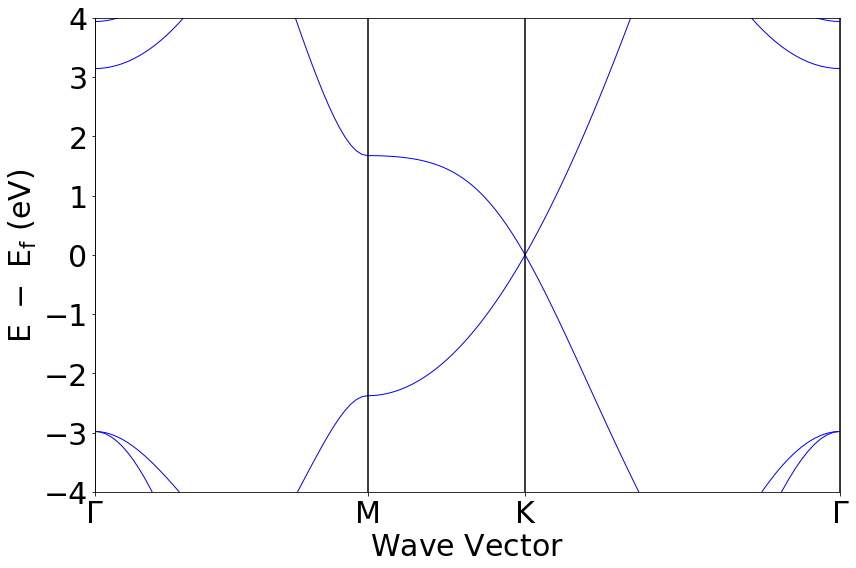

In [10]:
plot = BSPlotter(structure)

# Formatted raw data for easy plotting
f = open('TEST', 'w')
f.write(str(plot.bs_plot_data(zero_to_efermi=True)))
f.close()

plot.save_plot('{}_band.png'.format(formula), img_format="png")
plot.show()